In [1]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
# Define paths
data_path = "../data/"

# Data preparation
Data grouped in intervals of 15 minutes and keeping only year 2022

In [3]:
# Keep 15 minutes max
time_interval = '15min'

df = (
    pd.read_csv(data_path+'data_raw.csv', names=['date', 'value', 'variable', 'system'])
    .assign(date=lambda df_: pd.to_datetime(df_.date))
    .assign(date_rounded=lambda df_: df_.date.dt.round(time_interval))
    .pivot_table(index=['date_rounded', 'system'], columns=['variable'], values='value')
    .reset_index()
    .assign(system=lambda df_: df_.system.astype('category'))
    .assign(hour=lambda df_: df_.date_rounded.dt.hour)
    .assign(month=lambda df_: df_.date_rounded.dt.month)
    .assign(year=lambda df_: df_.date_rounded.dt.year)
    .assign(moment_day=lambda df_: df_.hour.between(6,16, inclusive='left').map({True:'day', False:'night'}))
    # .loc[lambda df_: df_.year == 2022]
    .loc[lambda df_: df_.date_rounded < '2022-12-30']
)

# df['cuts'] = pd.cut(df.date, bins=pd.date_range('2022-10-01 00:00:00', '2023-01-12 23:59:59',freq= "2min"))

In [4]:
# Export prepped data
df.to_csv(data_path + 'data_prepped.csv', index=False)

# Data exploration
## Check general composition

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 0 to 16104
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date_rounded          16105 non-null  datetime64[ns]
 1   system                16105 non-null  category      
 2   Humedad Relativa      16095 non-null  float64       
 3   Luminosidad           16105 non-null  float64       
 4   PH Peces              16105 non-null  float64       
 5   PH Plantas            16105 non-null  float64       
 6   Temp Tanque Peces     16105 non-null  float64       
 7   Temp Tanque Plantas   16105 non-null  float64       
 8   Temperatura Ambiente  16103 non-null  float64       
 9   hour                  16105 non-null  int64         
 10  month                 16105 non-null  int64         
 11  year                  16105 non-null  int64         
 12  moment_day            16105 non-null  object        
dtypes: category(1), 

## Check specifically for null values

In [6]:
# Tot number of NaN values per variable
df.isnull().sum()

variable
date_rounded             0
system                   0
Humedad Relativa        10
Luminosidad              0
PH Peces                 0
PH Plantas               0
Temp Tanque Peces        0
Temp Tanque Plantas      0
Temperatura Ambiente     2
hour                     0
month                    0
year                     0
moment_day               0
dtype: int64

In [7]:
# All rows that contain at least 1 NaN value
df[df.isnull().any(axis=1)]

variable        date_rounded     system  Humedad Relativa   Luminosidad  \
163      2022-10-01 20:15:00  Sistema 2               NaN  65534.000000   
1374     2022-10-09 11:30:00  Sistema 1               NaN   6217.466667   
1424     2022-10-09 17:45:00  Sistema 1               NaN     27.900000   
1455     2022-10-09 21:30:00  Sistema 2               NaN  65534.000000   
6025     2022-11-02 16:45:00  Sistema 2               NaN  65534.000000   
9913     2022-11-22 23:00:00  Sistema 1               NaN      0.000000   
12571    2022-12-06 19:15:00  Sistema 1              82.0      0.000000   
12729    2022-12-07 15:00:00  Sistema 1               NaN    661.526316   
13253    2022-12-10 08:30:00  Sistema 1               NaN   5073.727273   
13254    2022-12-10 08:30:00  Sistema 2               NaN  65534.000000   
15262    2022-12-20 19:30:00  Sistema 2               NaN  65534.000000   
15665    2022-12-22 22:00:00  Sistema 1              93.0      0.000000   

variable  PH Peces  PH Plantas  Temp Tanque Peces  Temp Tanque Plantas  \
163       4.506131    4.010567          18.703125             0.000000   
1374     -0.794324   -5.780124          17.257812            16.994318   
1424     -1.739840   -5.762342          18.359375            18.250000   
1455      3.887332    2.484056          17.265625             0.000000   
6025      5.289602    4.041799          16.617188             0.000000   
9913      0.431057    3.539483          18.270833            18.156250   
12571     0.034240    1.702053          17.075000            17.062500   
12729     0.271023   -4.044547          16.500000            16.450000   
13253    -0.512332   -4.775850          15.322917            15.275000   
13254     5.111993    3.664985          14.482143             0.000000   
15262     4.170898    3.146367          17.287500             0.000000   
15665    -0.279081   -4.991549        -127.000000            18.453125   

variable  Temperatura Ambiente  hour  month  year moment_day  
163                       12.0    20     10  2022      night  
1374                      41.0    11     10  2022        day  
1424                      13.0    17     10  2022      night  
1455                      14.0    21     10  2022      night  
6025                      15.0    16     11  2022      night  
9913                      10.5    23     11  2022      night  
12571                      NaN    19     12  2022      night  
12729                     17.0    15     12  2022        day  
13253                     42.5     8     12  2022        day  
13254                     20.0     8     12  2022        day  
15262                     13.0    19     12  2022      night  
15665                      NaN    22     12  2022      night

In [8]:
# Remove all NaN for now
df = df.dropna().copy()
df.shape

(16093, 13)

# Visual inspection of data

In [9]:
sns.set(context='notebook', style='ticks')

system
Sistema 1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
Sistema 2    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

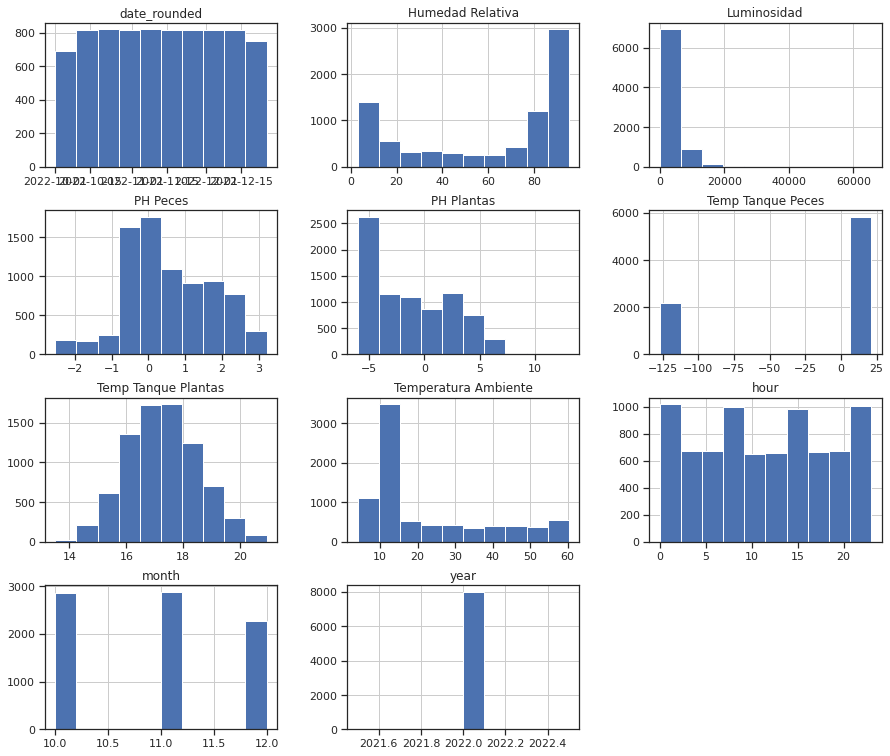

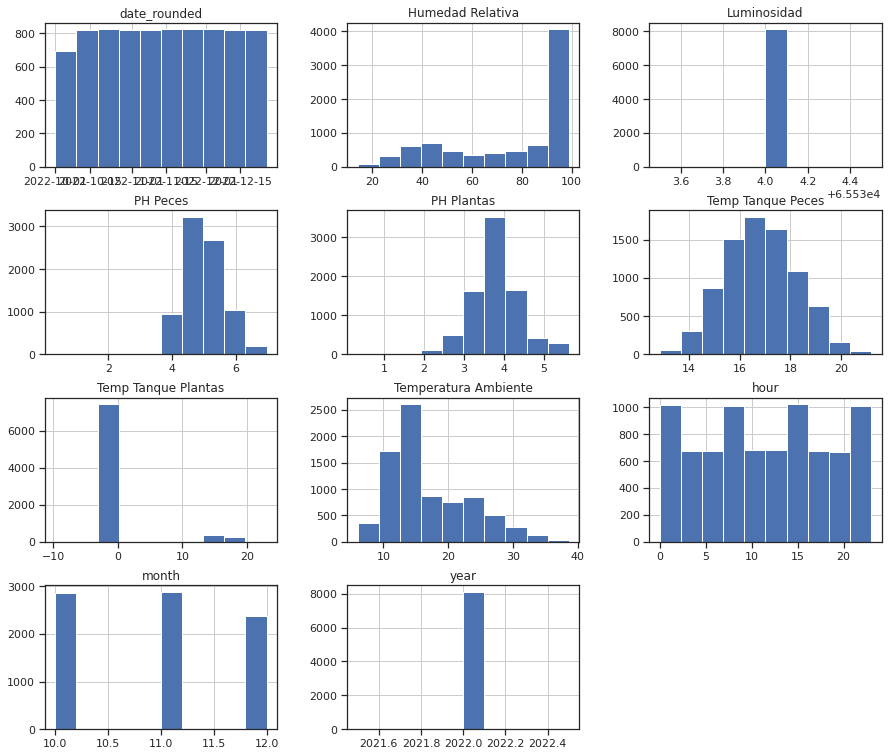

In [10]:
df.groupby('system').hist(figsize=(15,13))

## Luminosidad and HUmedad relativa and Temperatura Ambiente --> only System 1

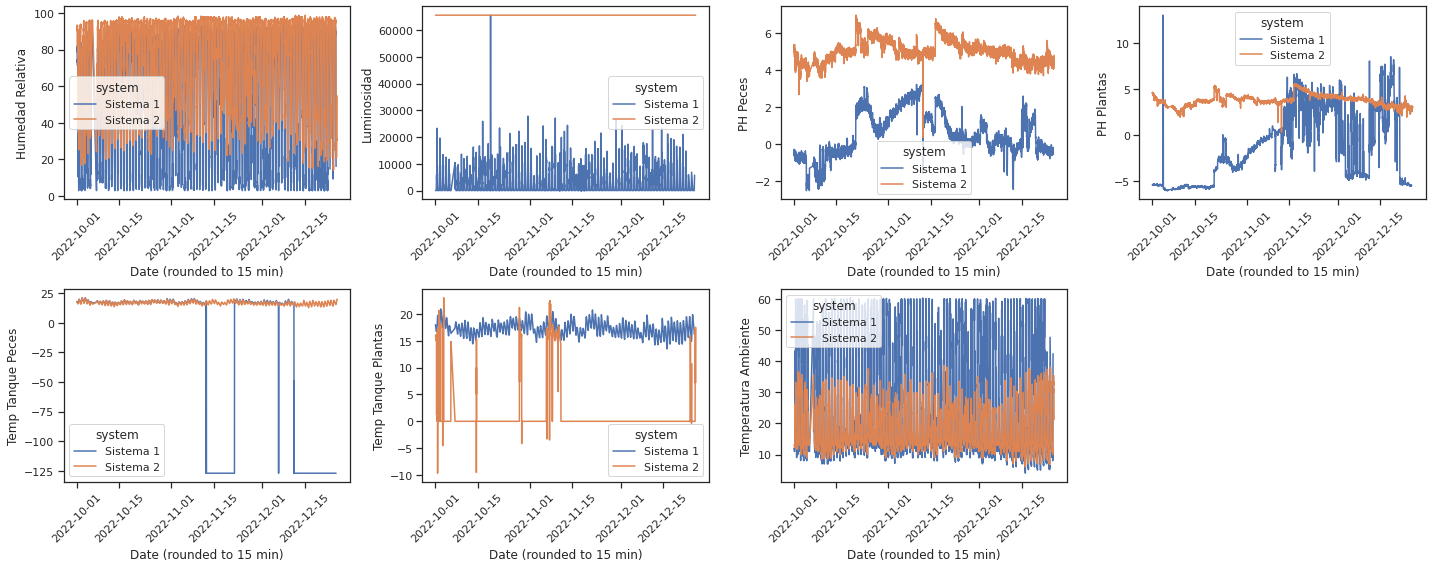

In [11]:
cols_to_plot = ['Humedad Relativa', 'Luminosidad', 'PH Peces',
       'PH Plantas', 'Temp Tanque Peces', 'Temp Tanque Plantas',
       'Temperatura Ambiente']

f, axes = plt.subplots(2,4, figsize=(20,8))
for col, ax in zip(cols_to_plot, axes.ravel()):
    sns.lineplot(data=df, x='date_rounded', y=col, hue='system', ax=ax)
    ax.set_xlabel('Date (rounded to 15 min)')
    for label in ax.get_xticklabels():
        label.set_rotation(45)
axes.ravel()[-1].set_axis_off()
plt.tight_layout()

# Taking a closer look to all variables
## Humedad Relativa

In [12]:
current_df = df[['date_rounded', 'hour', 'moment_day', 'Humedad Relativa', 'system']]
current_df.groupby('system').describe()['Humedad Relativa']

count       mean        std   min        25%        50%  \
system                                                                
Sistema 1  7997.0  59.735249  33.569116   3.0  23.142857  79.500000   
Sistema 2  8096.0  75.767711  24.310141  14.0  53.382212  90.357143   

                 75%        max  
system                           
Sistema 1  88.000000  95.071429  
Sistema 2  95.785714  98.846154

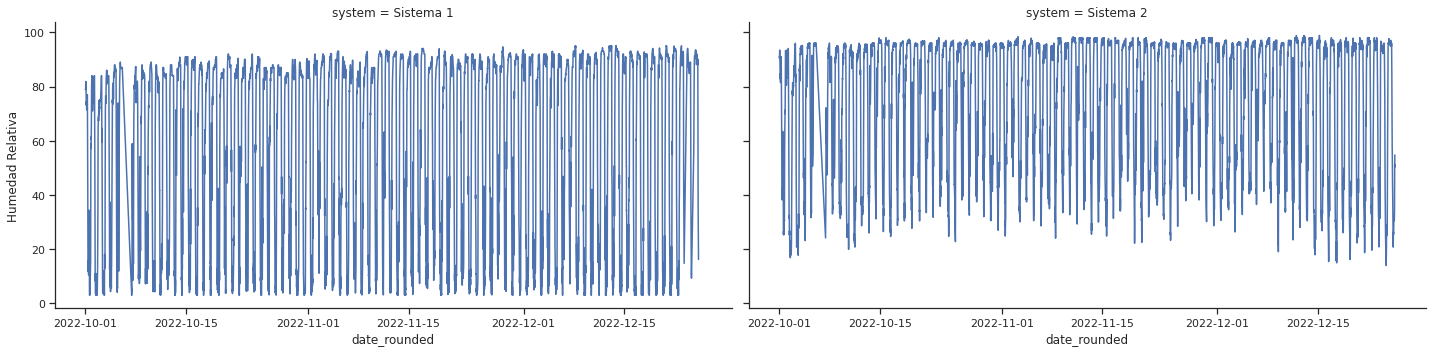

In [13]:
sns.relplot(data=current_df, x='date_rounded', y='Humedad Relativa', kind='line', col='system', aspect=2)

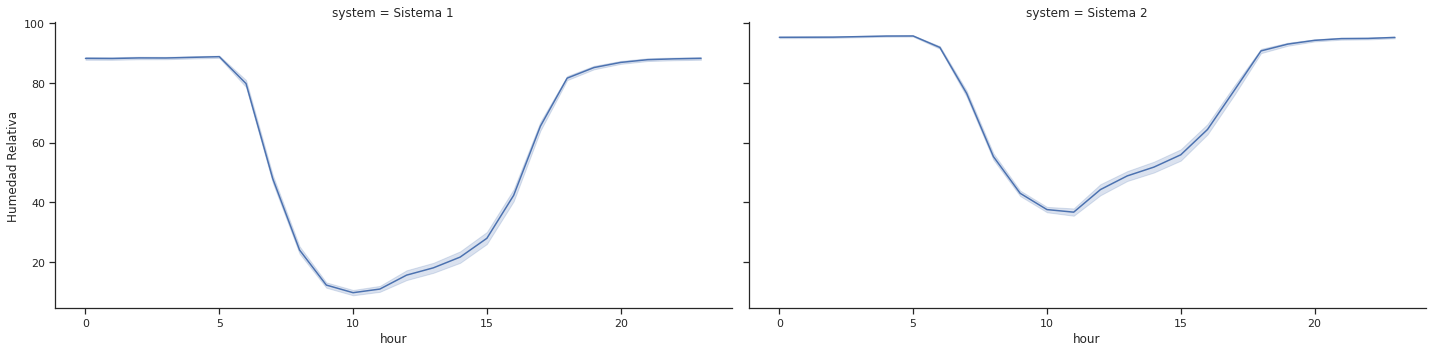

In [14]:
sns.relplot(data=current_df, x='hour', y='Humedad Relativa', kind='line', col='system', aspect=2)

## Luminosidad

In [15]:
current_df = df[['date_rounded', 'hour', 'moment_day', 'Luminosidad', 'system']]
current_df.groupby('system').describe()['Luminosidad']

count          mean          std      min      25%           50%  \
system                                                                         
Sistema 1  7997.0   2356.202168  3932.198145      0.0      0.0     17.285714   
Sistema 2  8096.0  65534.000000     0.000000  65534.0  65534.0  65534.000000   

                    75%      max  
system                            
Sistema 1   3485.692308  65535.0  
Sistema 2  65534.000000  65534.0

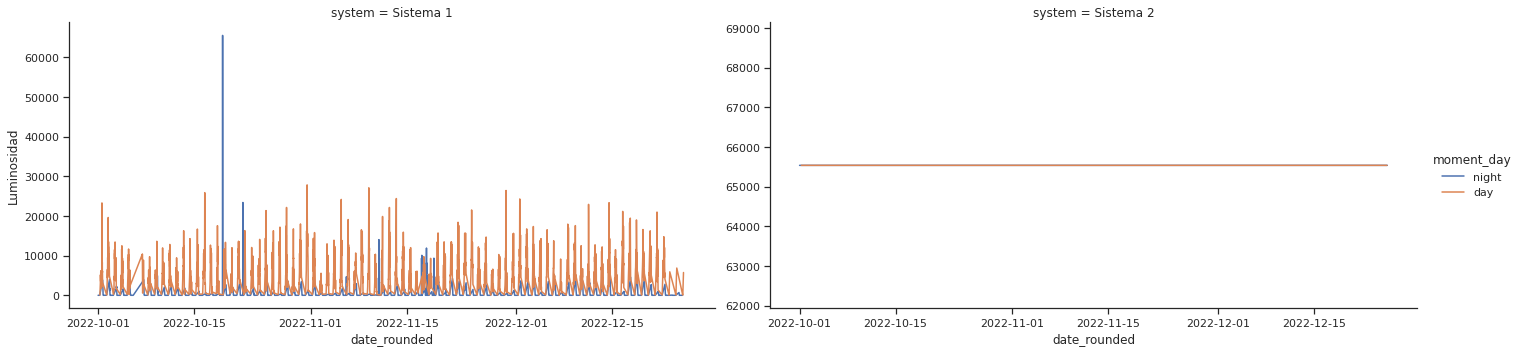

In [16]:
sns.relplot(data=current_df, x='date_rounded', y='Luminosidad', kind='line', hue='moment_day', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

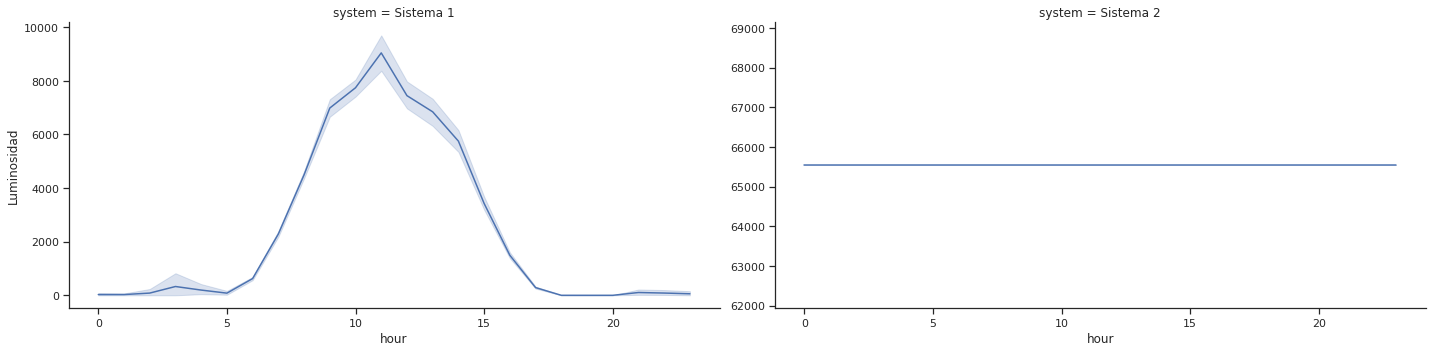

In [17]:
sns.relplot(data=current_df, x='hour', y='Luminosidad', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

## PH peces
- Normal PH range: 0 - 14
- the lower the more basic
- the higher the more acid
- Neutral pH 7
- Fishes pH should be around 6.5-7.5
- Plant pH could be around 4.5-6

In [18]:
current_df = df[['date_rounded', 'hour', 'month','moment_day', 'PH Peces', 'system']]
current_df.groupby('system').describe()['PH Peces']

count      mean       std       min       25%       50%       75%  \
system                                                                          
Sistema 1  7997.0  0.550320  1.172109 -2.534379 -0.312124  0.340272  1.490331   
Sistema 2  8096.0  4.992165  0.579514  0.342923  4.611329  4.954847  5.328377   

                max  
system               
Sistema 1  3.211942  
Sistema 2  6.955681

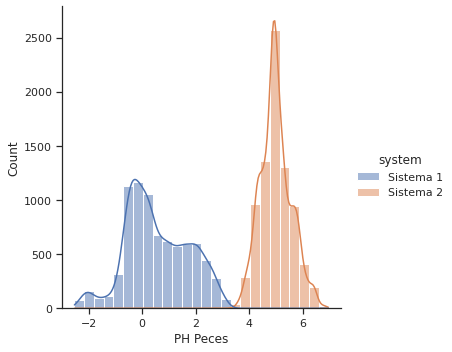

In [19]:
sns.displot(data=current_df, x='PH Peces', hue='system', kde=True)

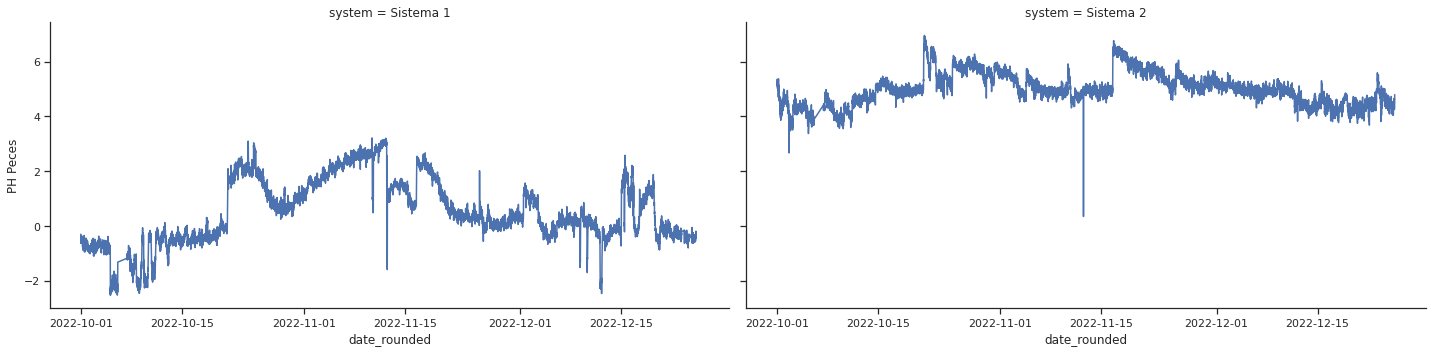

In [20]:
sns.relplot(data=current_df, x='date_rounded', y='PH Peces', kind='line', col='system', aspect=2)

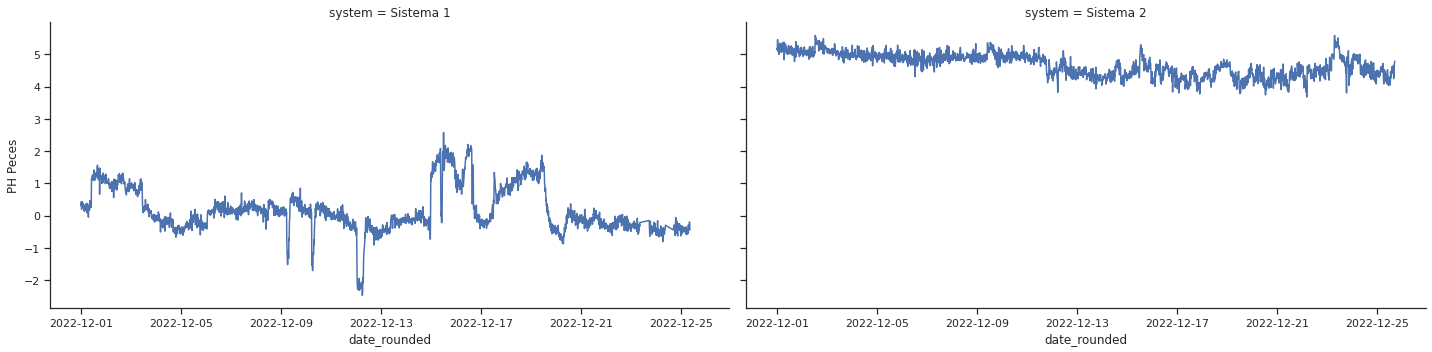

In [21]:
# Test a specific month
month = 12
sns.relplot(data=current_df[current_df.month==month], x='date_rounded', y='PH Peces', kind='line', col='system', aspect=2)

## PH Plantas

In [22]:
current_df = df[['date_rounded', 'hour', 'month','moment_day', 'PH Plantas', 'system']]
current_df.groupby('system').describe()['PH Plantas']

count      mean       std       min      25%       50%       75%  \
system                                                                         
Sistema 1  7997.0 -1.258804  3.764905 -6.037570 -5.21288 -1.721949  2.402880   
Sistema 2  8096.0  3.794399  0.593815  0.335193  3.45755  3.784099  4.113026   

                 max  
system                
Sistema 1  13.054871  
Sistema 2   5.620406

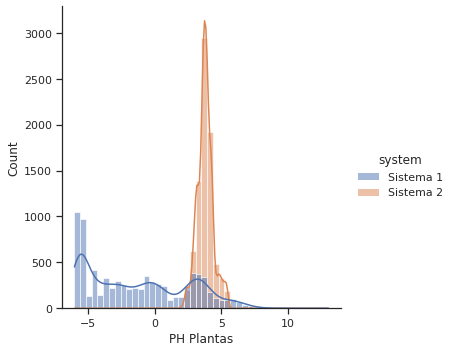

In [23]:
sns.displot(data=current_df, x='PH Plantas', hue='system', kde=True)

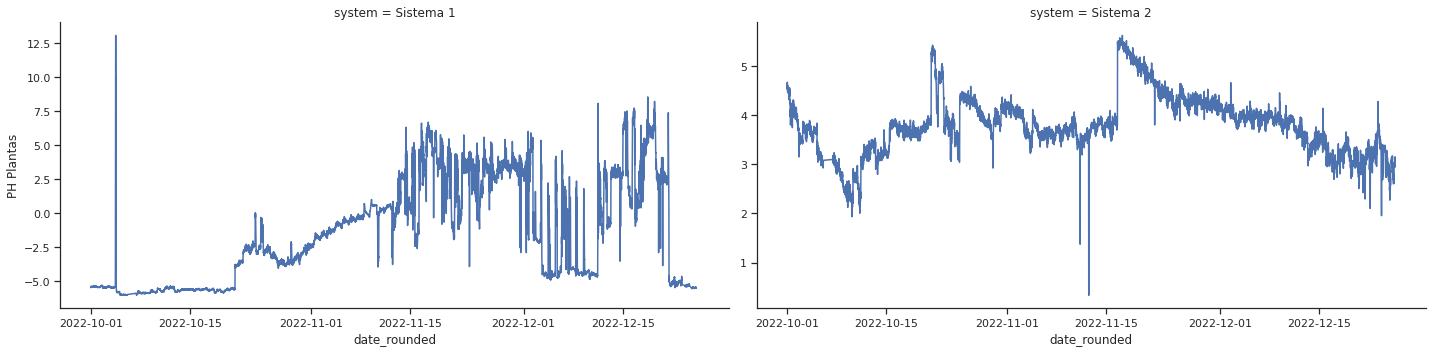

In [24]:
sns.relplot(data=current_df, x='date_rounded', y='PH Plantas', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

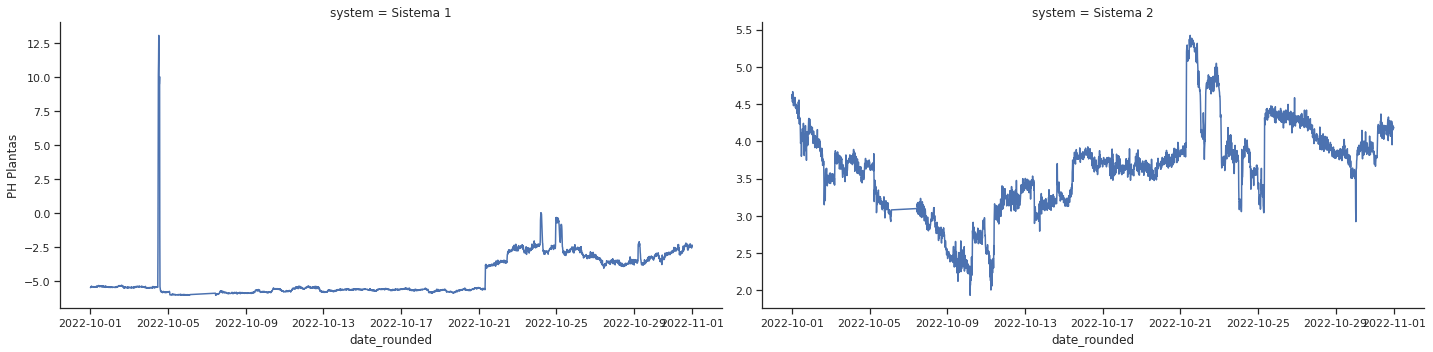

In [25]:
# Test a specific month
month = 10
sns.relplot(data=current_df[current_df.month==month], x='date_rounded', y='PH Plantas', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

## Temp Tanque Peces

In [26]:
current_df = df[['date_rounded', 'hour', 'month','moment_day', 'Temp Tanque Peces', 'system']]
current_df.groupby('system').describe()['Temp Tanque Peces']

count       mean        std         min         25%        50%  \
system                                                                       
Sistema 1  7997.0 -21.596270  64.131198 -127.000000 -127.000000  16.841346   
Sistema 2  8096.0  16.829164   1.390772   12.855769   15.830357  16.793269   

                 75%        max  
system                           
Sistema 1  17.901786  21.223214  
Sistema 2  17.790179  21.178571

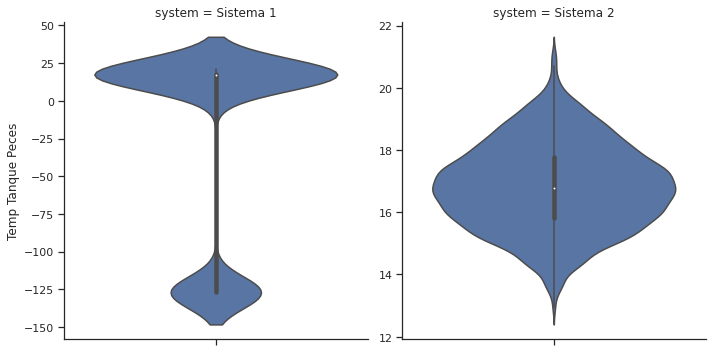

In [27]:
sns.catplot(data=current_df, y='Temp Tanque Peces', col='system', sharey=False, kind='violin')

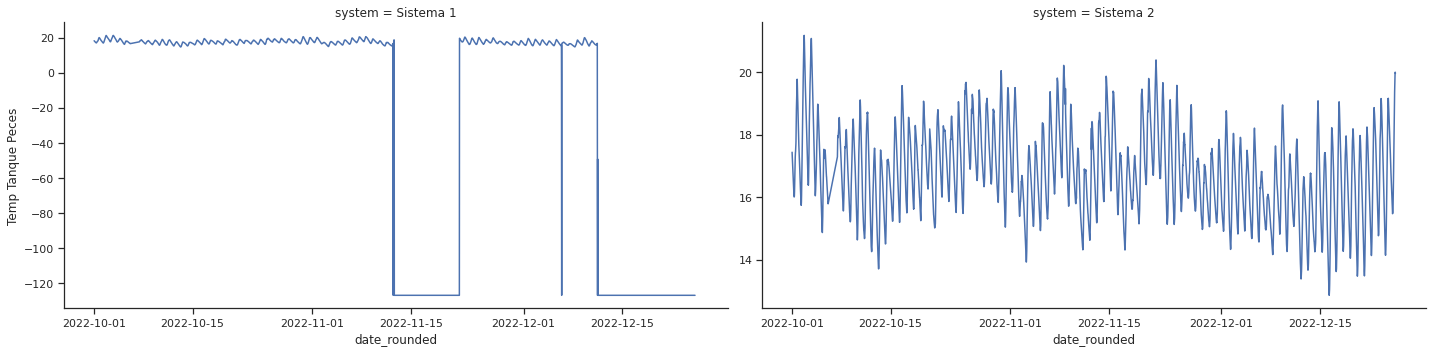

In [28]:
sns.relplot(data=current_df, x='date_rounded', y='Temp Tanque Peces', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

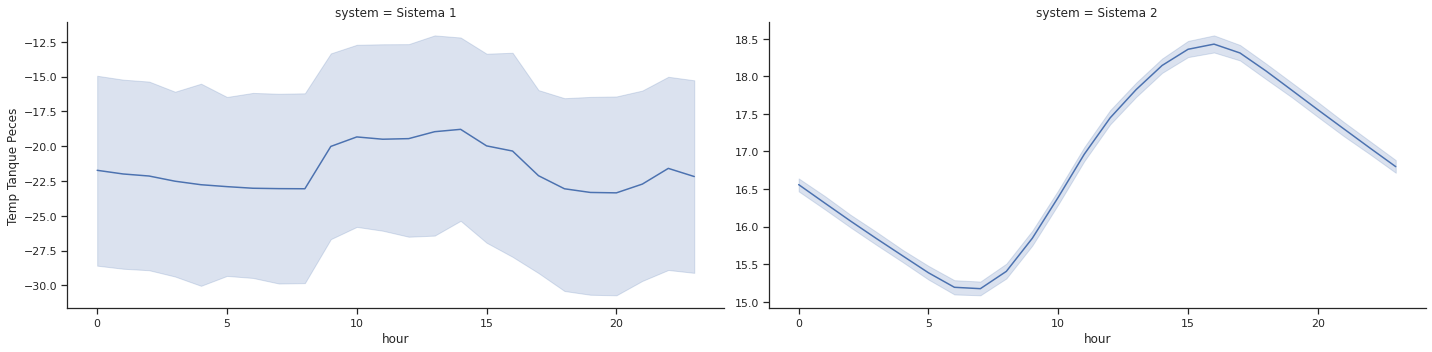

In [29]:
sns.relplot(data=current_df, x='hour', y='Temp Tanque Peces', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

## Temp Tanque Plantas

In [30]:
current_df = df[['date_rounded', 'hour', 'month','moment_day', 'Temp Tanque Plantas', 'system']]
current_df.groupby('system').describe()['Temp Tanque Plantas']

count       mean       std        min        25%        50%  \
system                                                                    
Sistema 1  7997.0  17.281902  1.260551  13.500000  16.379464  17.267857   
Sistema 2  8096.0   1.346124  4.499127  -9.666667   0.000000   0.000000   

                 75%        max  
system                           
Sistema 1  18.142857  20.937500  
Sistema 2   0.000000  23.017857

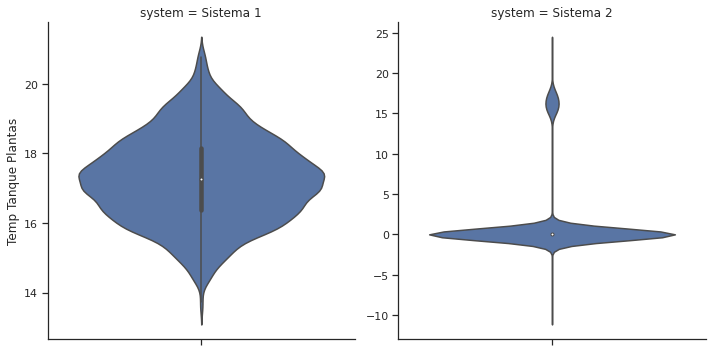

In [31]:
sns.catplot(data=current_df, y='Temp Tanque Plantas', col='system', sharey=False, kind='violin')

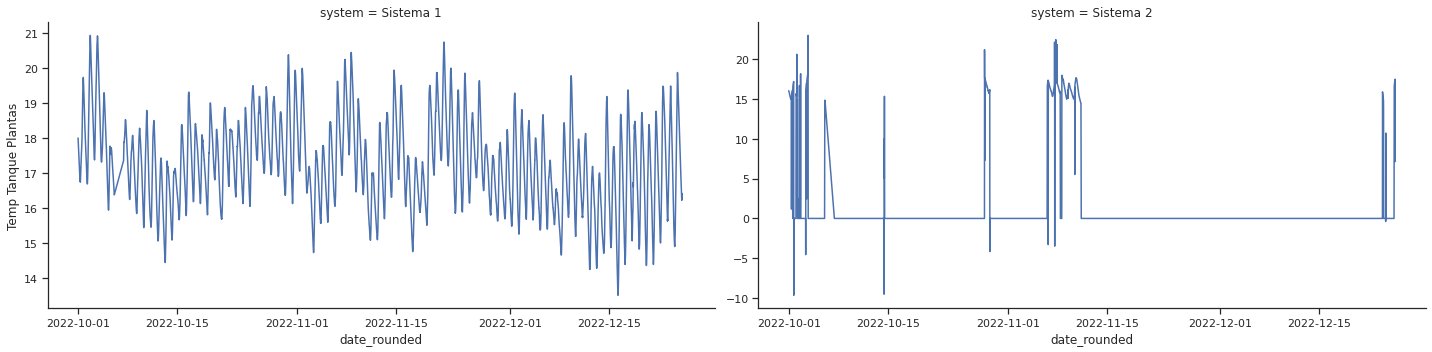

In [32]:
sns.relplot(data=current_df, x='date_rounded', y='Temp Tanque Plantas', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

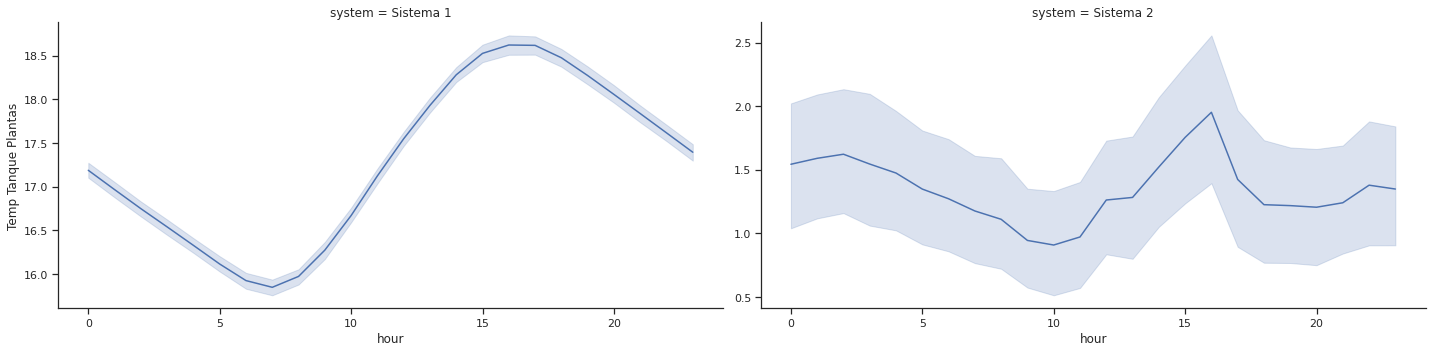

In [33]:
sns.relplot(data=current_df, x='hour', y='Temp Tanque Plantas', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

## Temperatura Ambiente

In [34]:
current_df = df[['date_rounded', 'hour', 'month','moment_day', 'Temperatura Ambiente', 'system']]
current_df.groupby('system').describe()['Temperatura Ambiente']

count       mean        std  min        25%   50%        75%  \
system                                                                     
Sistema 1  7997.0  22.387895  16.199924  4.0  11.000000  13.0  33.000000   
Sistema 2  8096.0  16.909293   6.223156  6.0  12.428571  14.0  21.307692   

                 max  
system                
Sistema 1  60.357143  
Sistema 2  38.642857

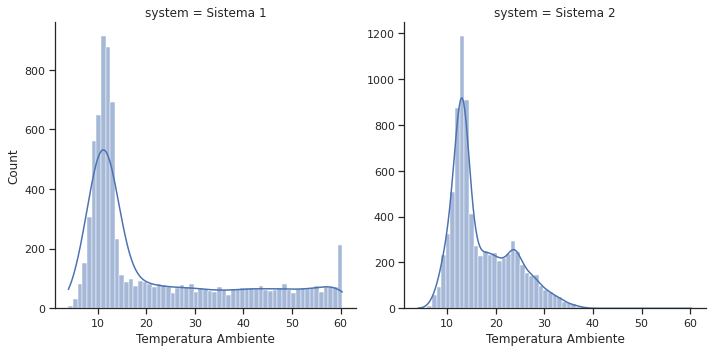

In [35]:
sns.displot(data=current_df, x='Temperatura Ambiente', col='system', kind='hist', kde=True, facet_kws={'sharey': False, 'sharex': True})

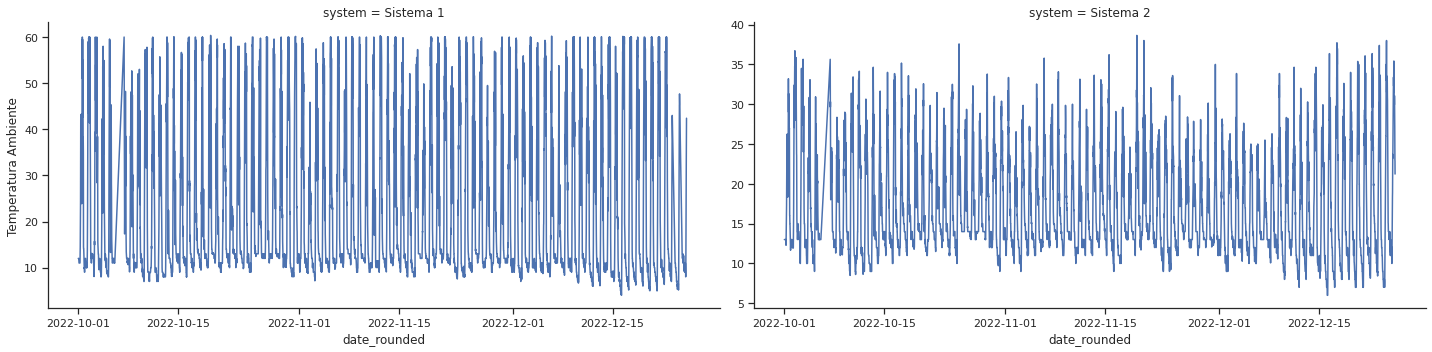

In [36]:
sns.relplot(data=current_df, x='date_rounded', y='Temperatura Ambiente', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

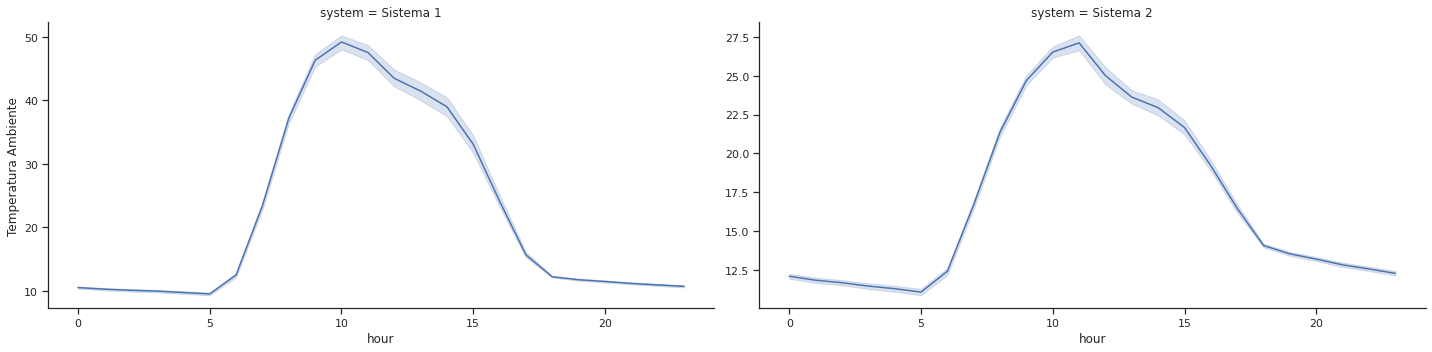

In [37]:
sns.relplot(data=current_df, x='hour', y='Temperatura Ambiente', kind='line', col='system', facet_kws={'sharey': False, 'sharex': True}, aspect=2)

# Filtering impossible values
## System 1

In [38]:
df_s1 = df[df.system == 'Sistema 1'].copy()
df_s1_f = df_s1[(df_s1['PH Peces'] >= 0) & (df_s1['PH Plantas'] >= 0) & (df_s1['Temp Tanque Peces'] >= 0)]

print('Original System 1: {}'.format(df_s1.shape))
print('Filtered System 1: {}'.format(df_s1_f.shape))

Original System 1: (7997, 13)
Filtered System 1: (1209, 13)


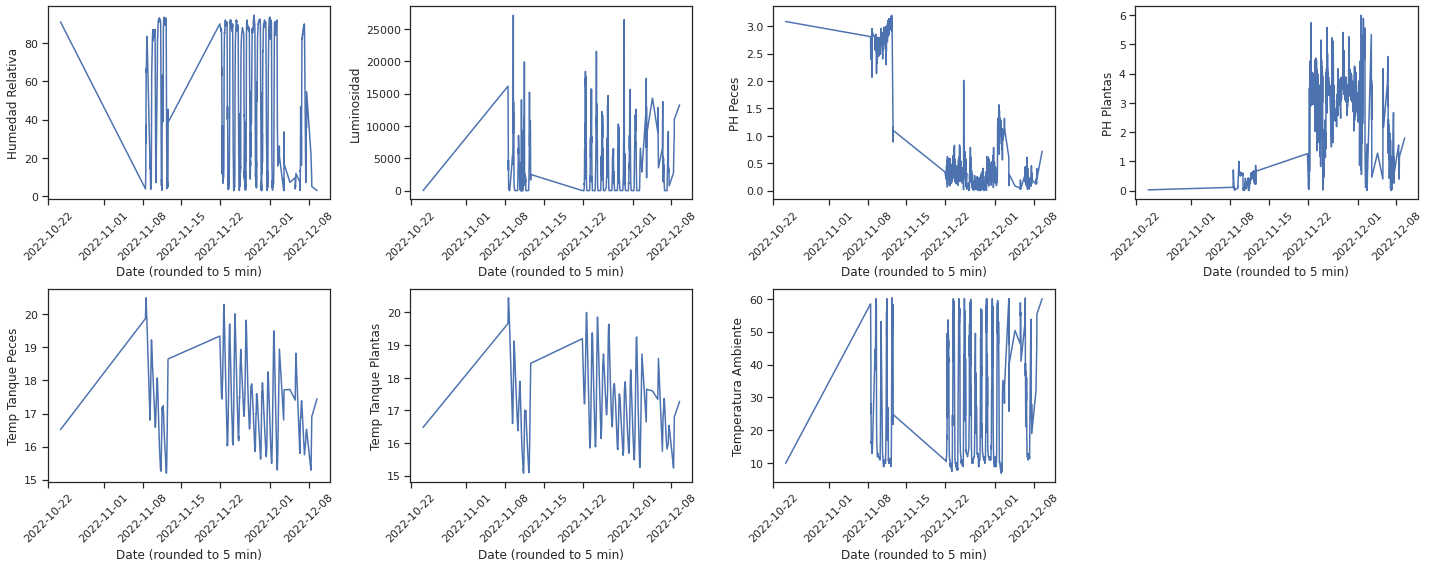

In [39]:
f, axes = plt.subplots(2,4, figsize=(20,8))
for col, ax in zip(cols_to_plot, axes.ravel()):
    sns.lineplot(data=df_s1_f, x='date_rounded', y=col, ax=ax)
    ax.set_xlabel('Date (rounded to 5 min)')
    for label in ax.get_xticklabels():
        label.set_rotation(45)
axes.ravel()[-1].set_axis_off()
plt.tight_layout()

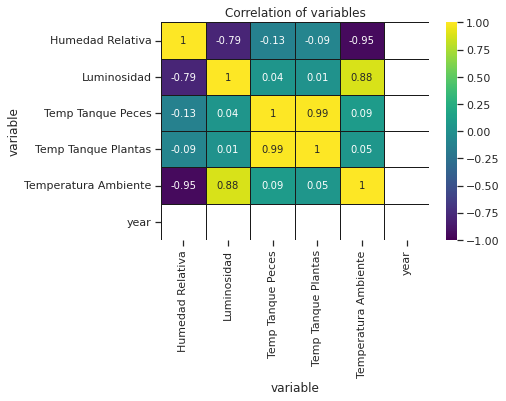

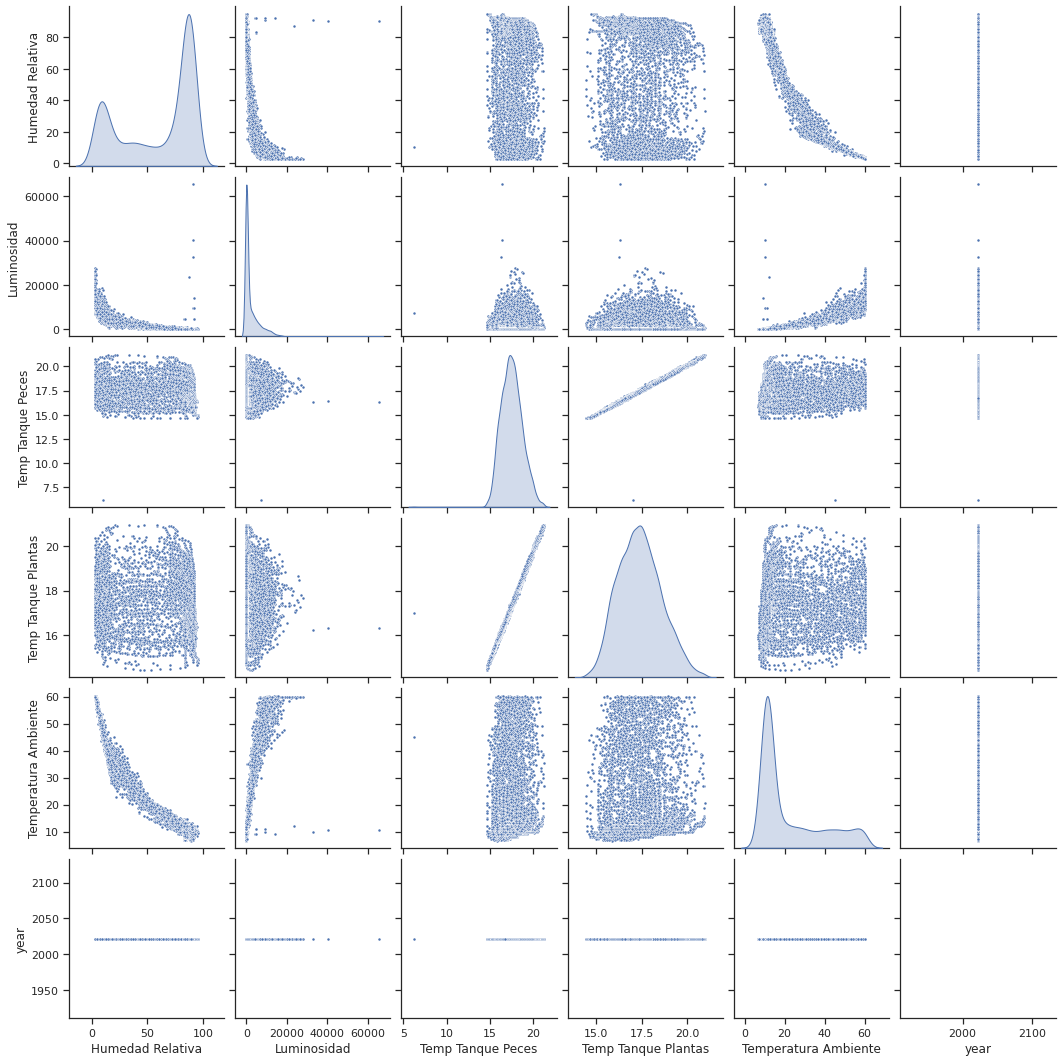

In [40]:
df_s1_f = df_s1[(df_s1['Temp Tanque Peces'] >= 0)].drop(columns=['PH Peces', 'PH Plantas', 'date_rounded', 'hour', 'month','moment_day','system'])

# Correlation matrix
g1 = sns.heatmap(df_s1_f.corr().round(2), vmin=-1, vmax=1, cmap='viridis', linewidth=0.5, linecolor='k', annot=True)
g1.set_title('Correlation of variables')
G2 = sns.pairplot(df_s1_f, diag_kind='kde', markers='.')
plt.show()

## System 2

## Important data manipulation
For the measurements of _Luminosidad_, _Humedad Relativa_ and _Temperatura Ambiente_ we keep only system 1 as reference. Measurements for system 2 are either wrong or less optimal and because the sensors are in the same room we can keep system 1 values with reason.

In [41]:
# Extract values from System 1 to apply to System 2
sys1_to_merge = df.loc[df.system == 'Sistema 1', ['date_rounded', 'Luminosidad', 'Humedad Relativa', 'Temperatura Ambiente']]

# Merge those values with System 2 values
df_s2 = (df[df.system == 'Sistema 2']
        .copy()
        .drop(columns=['Luminosidad', 'Humedad Relativa', 'Temperatura Ambiente'])
        .merge(sys1_to_merge, on ='date_rounded', how='inner')
       )
# Filter strange / impossible values
df_s2_f = (df_s2
           .loc[(df_s2['PH Peces'] >= 2) & (df_s2['PH Plantas'] >= 2) & (df_s2['Temp Tanque Plantas'] >= 0) & (df_s2['Luminosidad'] != (2**16)-1)]
          )
# Check how many values we filtered out
print('Original System 1: {}'.format(df_s2.shape))
print('Filtered System 1: {}'.format(df_s2_f.shape))

Original System 1: (7992, 13)
Filtered System 1: (7980, 13)


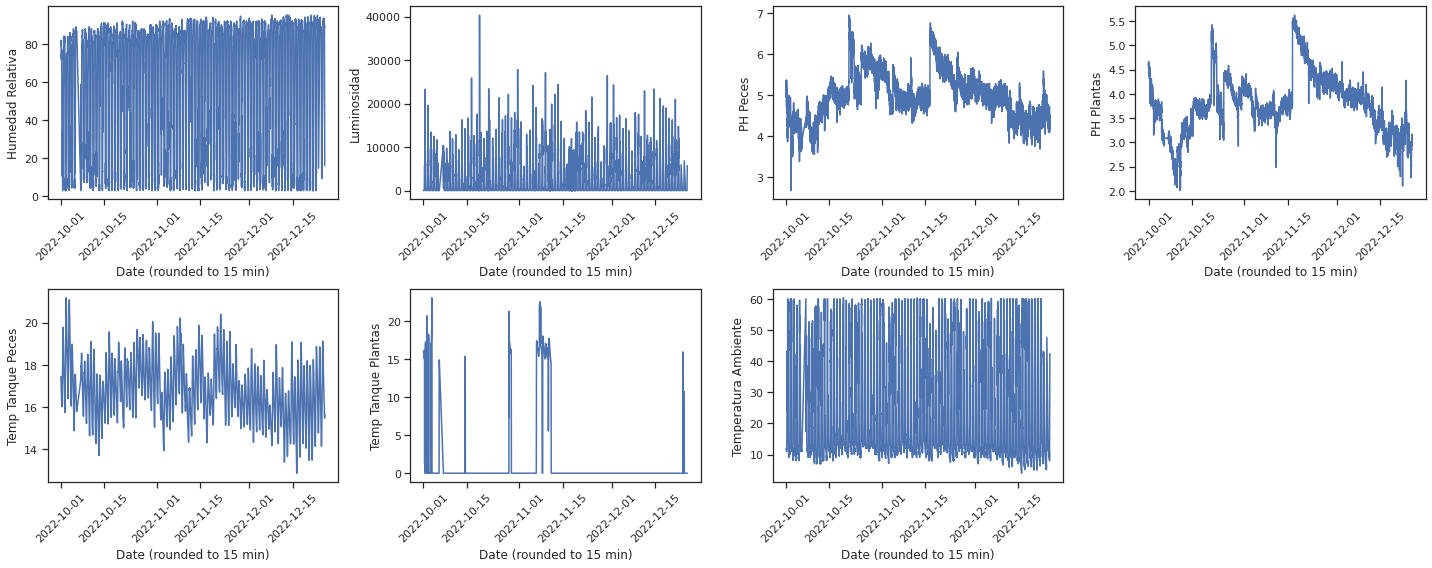

In [42]:
# Check time graph of filtered values
f, axes = plt.subplots(2,4, figsize=(20,8))
for col, ax in zip(cols_to_plot, axes.ravel()):
    sns.lineplot(data=df_s2_f, x='date_rounded', y=col, ax=ax)
    ax.set_xlabel('Date (rounded to 15 min)')
    for label in ax.get_xticklabels():
        label.set_rotation(45)
axes.ravel()[-1].set_axis_off()        
plt.tight_layout()

In [43]:
# Export cleaned data for system 2
(df_s2_f
 .drop(columns=['Temp Tanque Plantas','month', 'year'])
 .to_csv(data_path + 'data_sys2_filter.csv', index=False)
)

# Publication Figures

In [73]:
sns.set(context='notebook', style='ticks')

## Figure 1 - Data time series overview

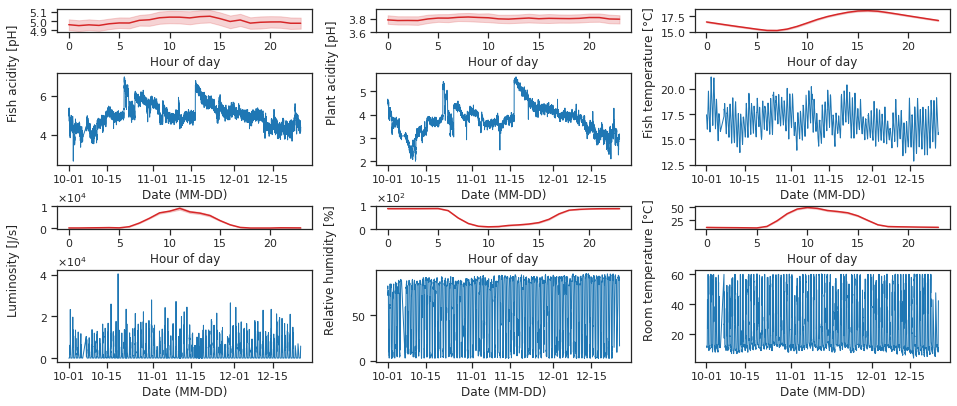

In [75]:
f, axes = plt.subplot_mosaic([[1, 3, 5], [2, 4, 6], [7, 9, 11], [8, 10, 12]], height_ratios=[1, 4, 1, 4],
                              figsize=(16,6.5), gridspec_kw={'hspace':0.7, 'wspace':0.25})

vars_to_plot = ['PH Peces', 'PH Plantas', 'Temp Tanque Peces', 'Luminosidad', 'Humedad Relativa', 'Temperatura Ambiente']
english_vars = ['Fish acidity [pH]', 'Plant acidity [pH]', 'Fish temperature [$\degree$C]', 'Luminosity [J/s]', 'Relative humidity [$\%$]', 'Room temperature [$\degree$C]']

for ii, ax_id in enumerate(range(1,13,2)):
    sns.lineplot(data=df_s2_f, x='hour', y=vars_to_plot[ii], ax=axes[ax_id], color='tab:red')
    sns.lineplot(data=df_s2_f, x='date_rounded', y=vars_to_plot[ii], ax=axes[ax_id + 1], color='tab:blue', linewidth=1)
    axes[ax_id].set_ylabel('')
    axes[ax_id].set_xlabel('Hour of day')
    axes[ax_id + 1].set_ylabel(english_vars[ii])
    axes[ax_id + 1].set_xlabel('Date (MM-DD)')
    axes[ax_id + 1].xaxis.set_major_formatter(DateFormatter("%m-%d"))
    axes[ax_id].ticklabel_format(axis='y', useMathText=True, scilimits=(0,2))
    axes[ax_id + 1].ticklabel_format(axis='y', useMathText=True, scilimits=(0,2))
    axes[ax_id + 1].yaxis.set_label_coords(x=-0.145, y=1 , transform=axes[ax_id + 1].transAxes)

axes[3].set_ylim(3.6,3.95)
axes[9].set_ylim(0,100)
plt.savefig('../figures/fig1_time_series_overview.png', dpi=300)
plt.savefig('../figures/fig1_time_series_overview.pdf')
plt.show()